In [ ]:
def full_summary(layer):

    #check if this layer has layers
    if hasattr(layer, 'layers'):
        print('summary for ' + layer.name)
        layer.summary()
        print('\n\n')

        for l in layer.layers:
            full_summary(l)

In [ ]:
MODEL_FOLDER = 'models/spgc-ternario-tf66/resnet101-ternary_cross/fold{}/'
TRAINING_FOLDER = 'training/spgc-ternario-tf66/resnet101-ternary_cross/fold{}/'

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import glob
import os
from datetime import datetime

import tensorflow as tf
import utilities.plot_metrics as pm

In [ ]:
axis = 'axis1'
fold = ''
training_folder = TRAINING_FOLDER.format(fold)
model = tf.keras.models.load_model("{}/{}/my_checkpoint".
                                           format(training_folder, axis))

In [ ]:
# model.summary()
full_summary(model)

In [2]:
# print(model.layers)
model.get_layer('dense_2').get_config()

NameError: name 'model' is not defined

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize='true')
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    print(cm)
    fig, ax = plt.subplots(figsize=figsize)
#     sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='viridis')
#     sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues', vmin=0, vmax=1, annot_kws={"size":15})
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues', vmin=0, vmax=1)
    sns.set(font_scale=2)
#     sns.heatmap(cm, annot=annot, fmt='', ax=ax)
#     plt.savefig(filename)
    plt.show()


Predicted     covid    normal       cap
Actual                                 
covid      0.890909  0.054545  0.054545
normal     0.041667  0.958333  0.000000
cap        0.263158  0.000000  0.736842


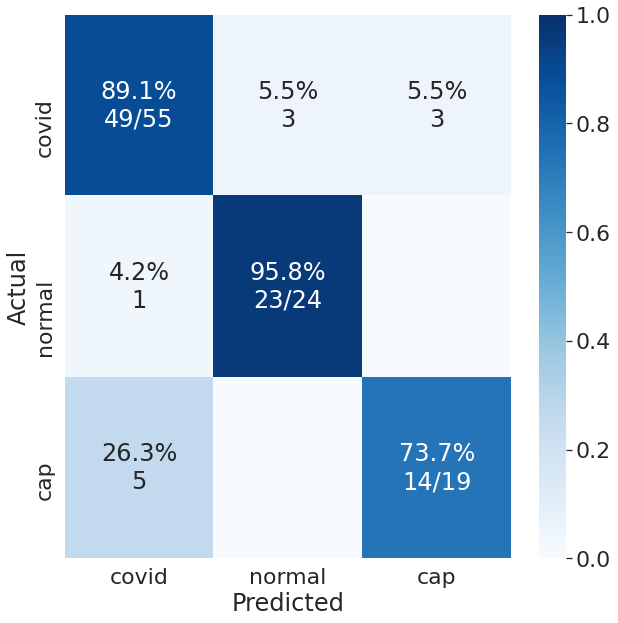

In [32]:
# y_pred = (['covid']*106)
y_pred = ['covid']*49
y_pred += ['normal']*3
y_pred += ['cap']*3
#####
y_pred += ['covid']*1
y_pred += ['normal']*23
y_pred += ['cap']*0
#####
y_pred += ['covid']*5
y_pred += ['normal']*0
y_pred += ['cap']*14


y_true = ['covid']*55
y_true += ['normal']*24
y_true += ['cap']*19
labels = ['covid', 'normal', 'cap']
# labels = ['covid', 'others']
# print(y_pred)
# print(y_true)
cm_analysis(y_true, y_pred, '', labels, figsize=(10,10))